In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB


#Data Loading and Cleaning

In [4]:
df = pd.read_csv('/content/Life Expectancy Data.csv')

In [5]:
#remove leading and trailing spaces from all column names in the DataFrame(df)
df.columns = df.columns.str.strip()


In [6]:
df.shape

(2938, 22)

In [7]:
df.head(1010)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,Germany,2004,Developed,79.1,86.0,3,11.83,5842.374765,88.0,121,...,96.0,1.37,96.0,0.1,34165.934300,8251626.0,1.1,1.1,0.877,16.4
1006,Germany,2003,Developed,78.5,9.0,3,11.92,582.615703,9.0,779,...,96.0,1.62,97.0,0.1,3359.952150,82534176.0,1.1,1.1,0.872,16.3
1007,Germany,2002,Developed,78.4,91.0,3,12.25,437.105966,87.0,4657,...,97.0,1.40,93.0,0.1,2525.164450,82488495.0,1.2,1.1,0.867,16.3
1008,Germany,2001,Developed,78.3,92.0,3,12.46,4057.637383,86.0,6024,...,96.0,1.15,93.0,0.1,23687.316890,82349925.0,1.2,1.1,0.860,16.2


In [8]:
df.tail(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [12]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [13]:
print(df.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


**Observations**

     -missing data in other columns(Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B', ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling')
     -

#Data Cleaning

In [14]:
#Handle Missing Values

# drop column not important in this modeling
df.dropna(subset=['Life expectancy'], inplace=True)
# Drop the 'Status' column
df.drop(columns=['Status'], inplace=True)

In [15]:
# Fill in missing Values in numeric and categorical features
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
for cols in cat_cols:
   df[cols] = df[cols].fillna(df[cols].mode()[0])

In [16]:
from scipy.stats import skew
# Calculate skewness for a column Life expectancy in your DataFrame 'df'
LifeEx_skewness = skew(df['Life expectancy'])
print(LifeEx_skewness)

-0.638277535245317


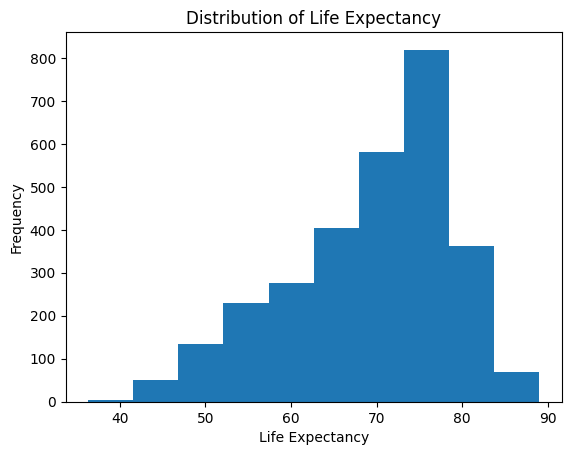

In [17]:
plt.hist(df['Life expectancy'])
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Log transform skewed variables
log_transform_cols = ['GDP', 'Population', 'percentage expenditure']
for col in log_transform_cols:
    df[f'log_{col}'] = np.log1p(df[col])
df.drop(columns=log_transform_cols, inplace=True)

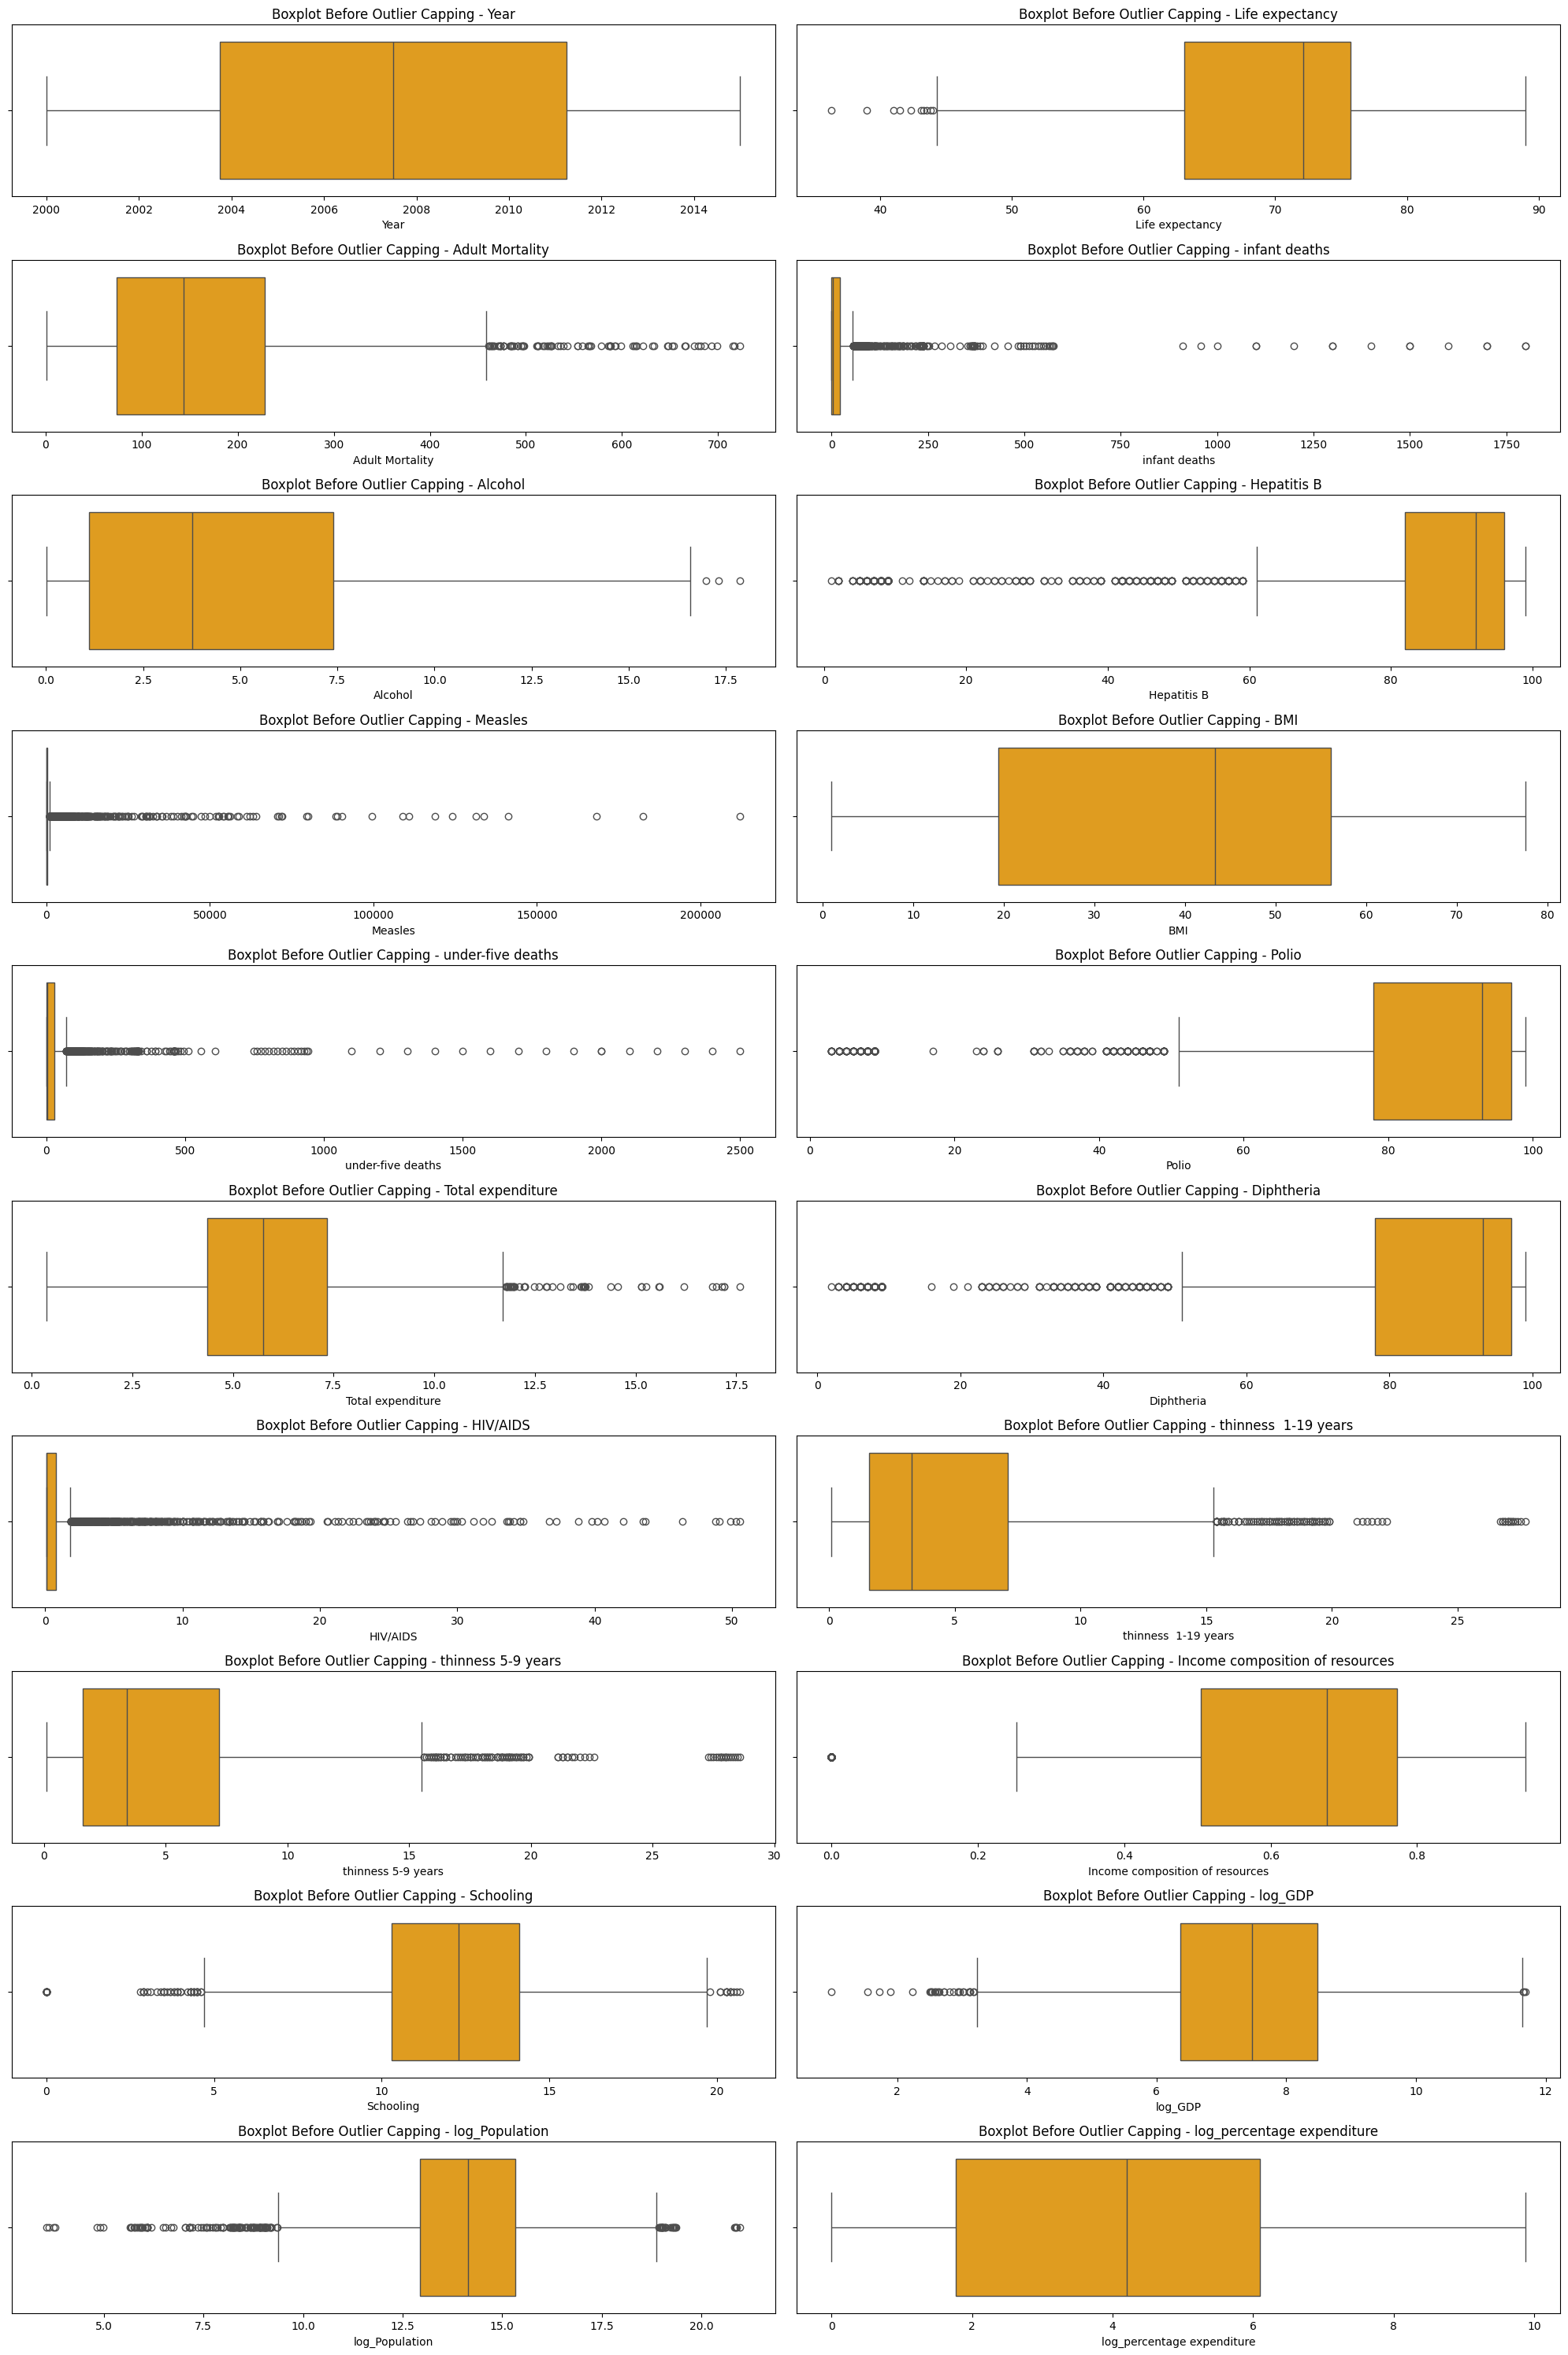

In [19]:
# Boxplots before outlier capping
plt.figure(figsize=(20, 30))
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns[:20]):
    plt.subplot(10, 2, i + 1)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f"Boxplot Before Outlier Capping - {col}")
    plt.tight_layout()
plt.show()

In [20]:
#Handle Outliers

# Cap outliers using IQR method
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

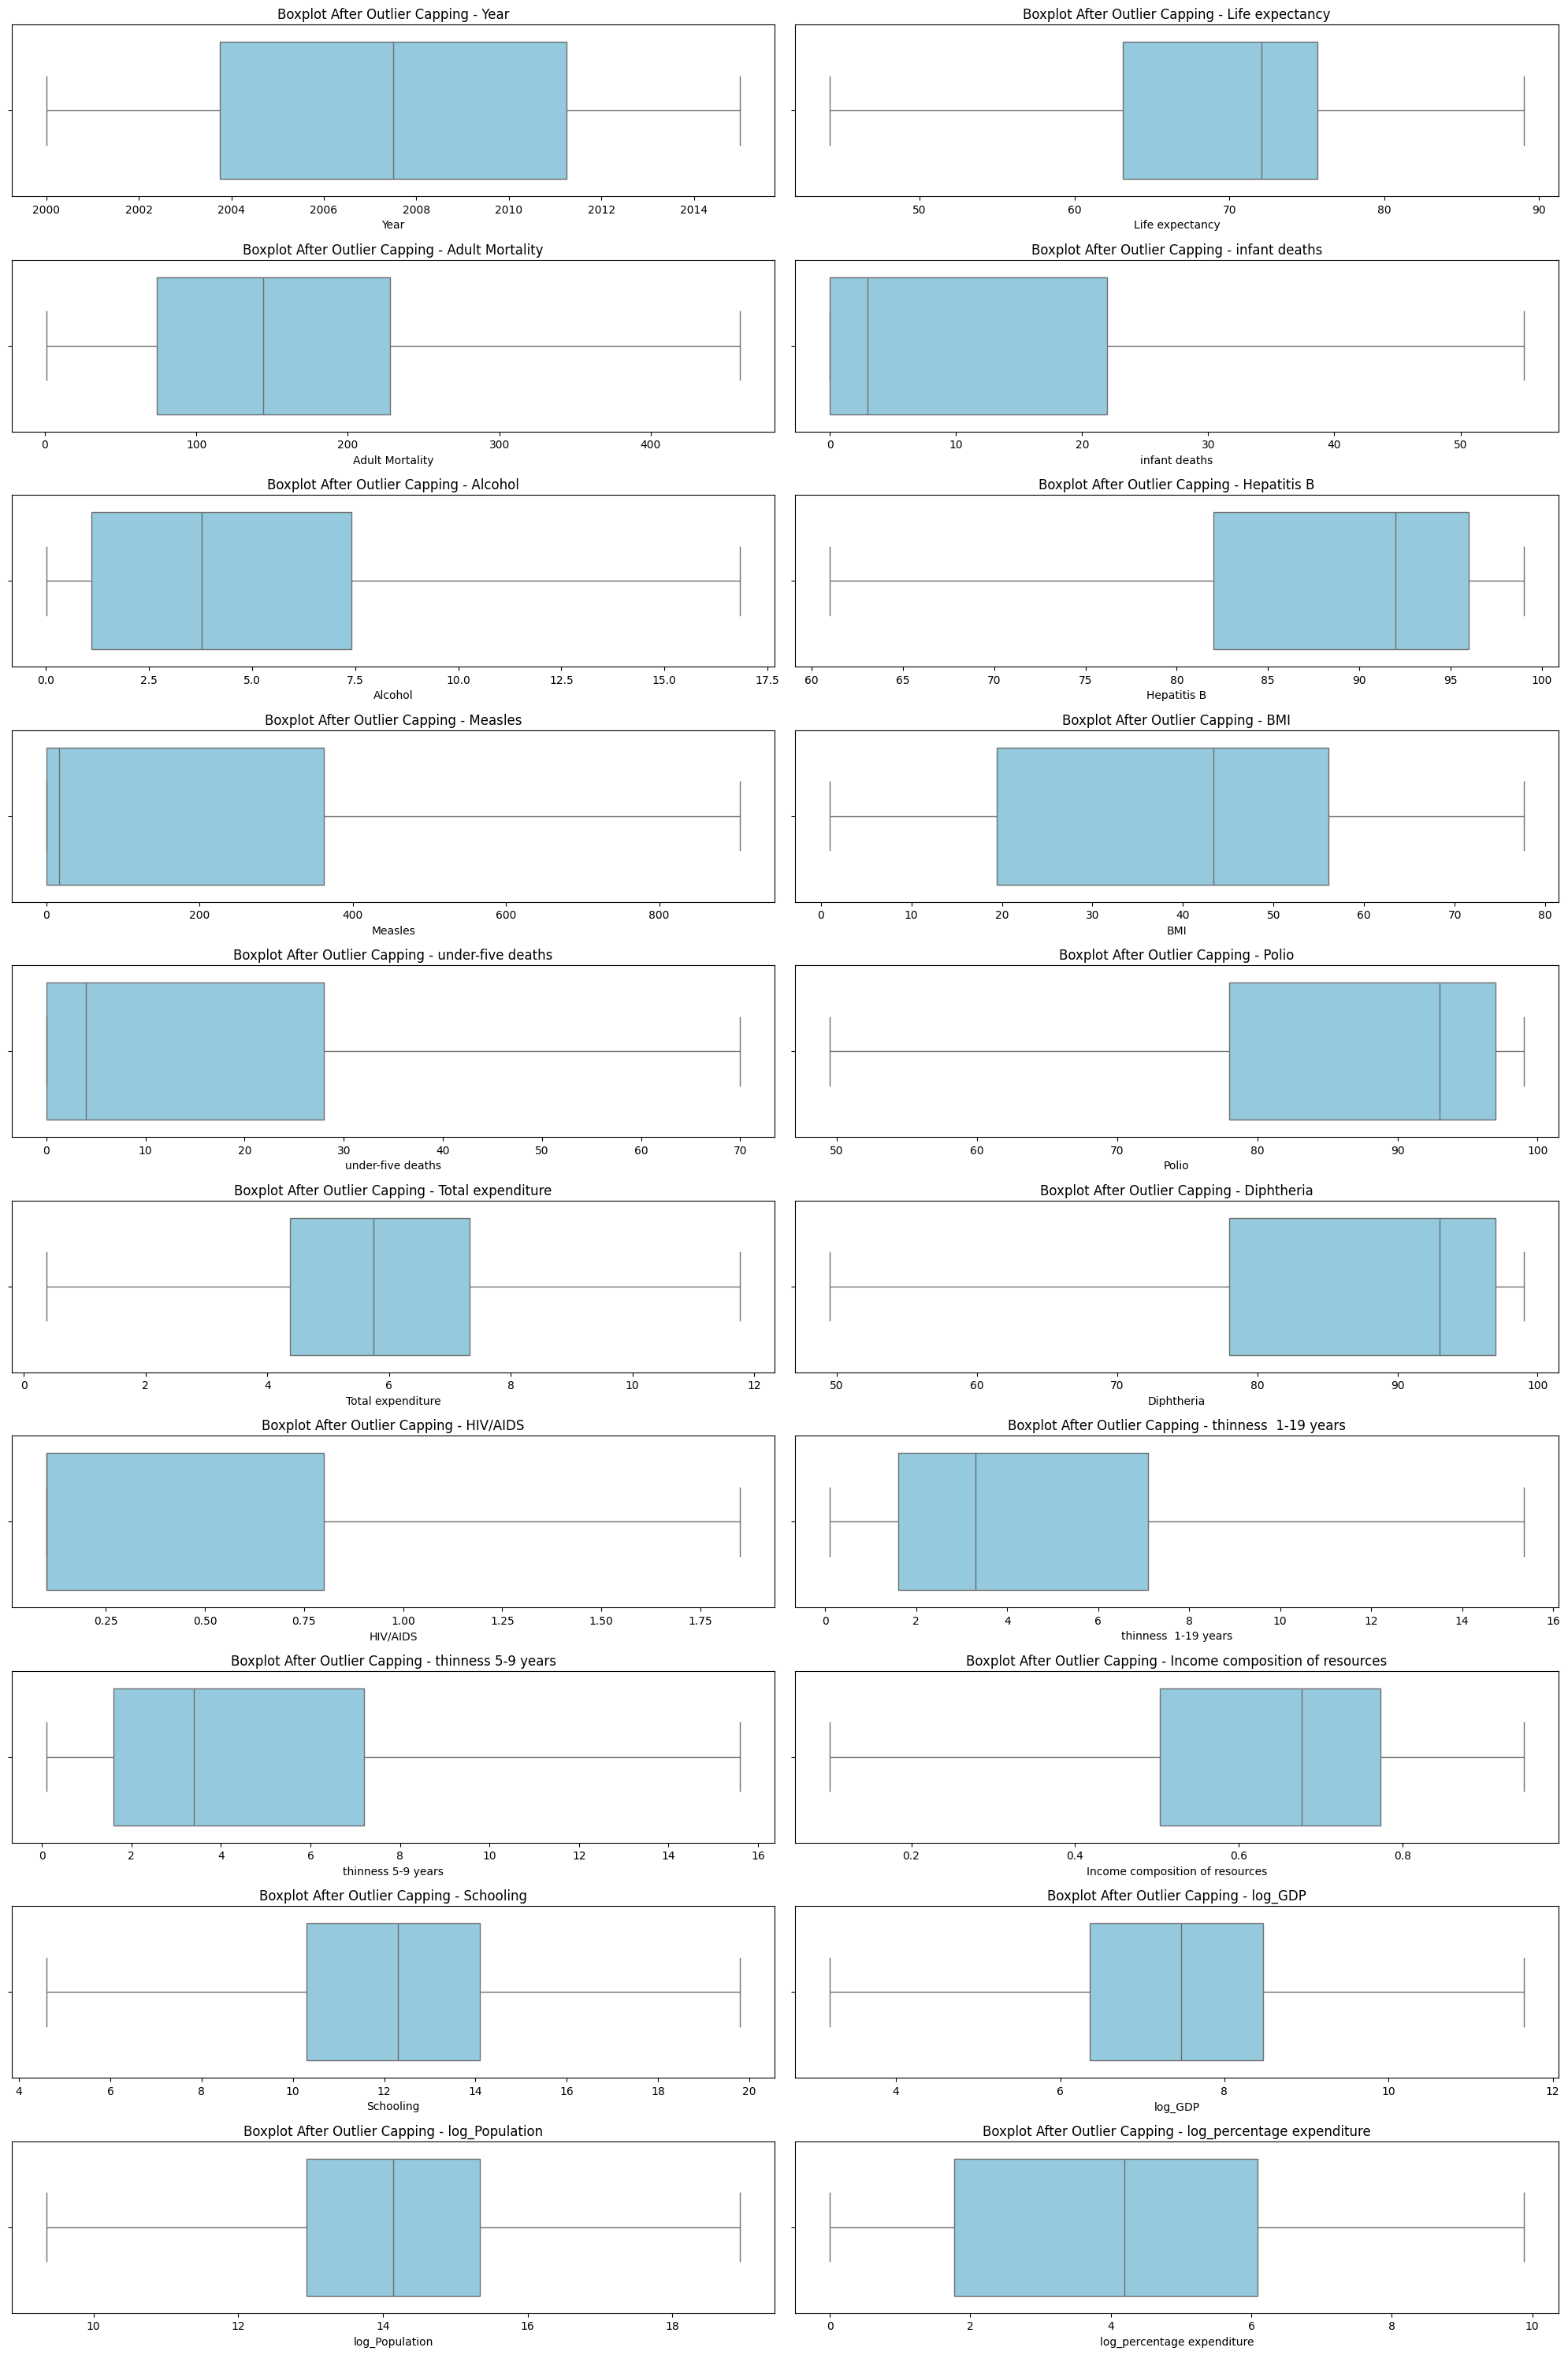

In [21]:
# Boxplots after outlier capping
plt.figure(figsize=(20, 30))
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns[:20]):
    plt.subplot(10, 2, i + 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Boxplot After Outlier Capping - {col}")
    plt.tight_layout()
plt.show()

In [22]:
df.head(2800)

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,log_GDP,log_Population,log_percentage expenditure
0,Afghanistan,2015.0,65.0,263.0,55.0,0.01,65.0,905.625,19.1,70.0,...,8.16,65.0,0.1,15.35,15.6,0.479,10.1,6.372055,17.334091,4.280542
1,Afghanistan,2014.0,59.9,271.0,55.0,0.01,62.0,492.000,18.6,70.0,...,8.18,62.0,0.1,15.35,15.6,0.476,10.0,6.419501,12.699497,4.311116
2,Afghanistan,2013.0,59.9,268.0,55.0,0.01,64.0,430.000,18.1,70.0,...,8.13,64.0,0.1,15.35,15.6,0.470,9.9,6.450067,17.272826,4.307023
3,Afghanistan,2012.0,59.5,272.0,55.0,0.01,67.0,905.625,17.6,70.0,...,8.52,67.0,0.1,15.35,15.6,0.463,9.8,6.508708,15.123021,4.371777
4,Afghanistan,2011.0,59.2,275.0,55.0,0.01,68.0,905.625,17.2,70.0,...,7.87,68.0,0.1,15.35,15.6,0.454,9.5,4.167242,14.906964,2.091507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805,United States of America,2004.0,77.5,111.0,28.0,8.48,92.0,37.000,63.1,33.0,...,11.77,96.0,0.1,0.70,0.6,0.677,12.3,7.476458,14.146078,0.000000
2806,United States of America,2003.0,77.2,114.0,28.0,8.40,92.0,56.000,62.4,33.0,...,11.77,96.0,0.1,0.70,0.6,0.677,12.3,7.476458,14.146078,0.000000
2807,United States of America,2002.0,77.0,115.0,28.0,8.33,88.0,41.000,61.7,33.0,...,11.77,94.0,0.1,0.80,0.6,0.677,12.3,7.476458,14.146078,0.000000
2808,United States of America,2001.0,76.9,115.0,28.0,8.25,89.0,116.000,6.9,33.0,...,11.77,94.0,0.1,0.80,0.6,0.677,12.3,7.476458,14.146078,0.000000


In [23]:
# Feature Scaling
scaler = StandardScaler()

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
numerical_features = numerical_features.drop('Life expectancy')
df[numerical_features] = scaler.fit_transform(df[numerical_features])

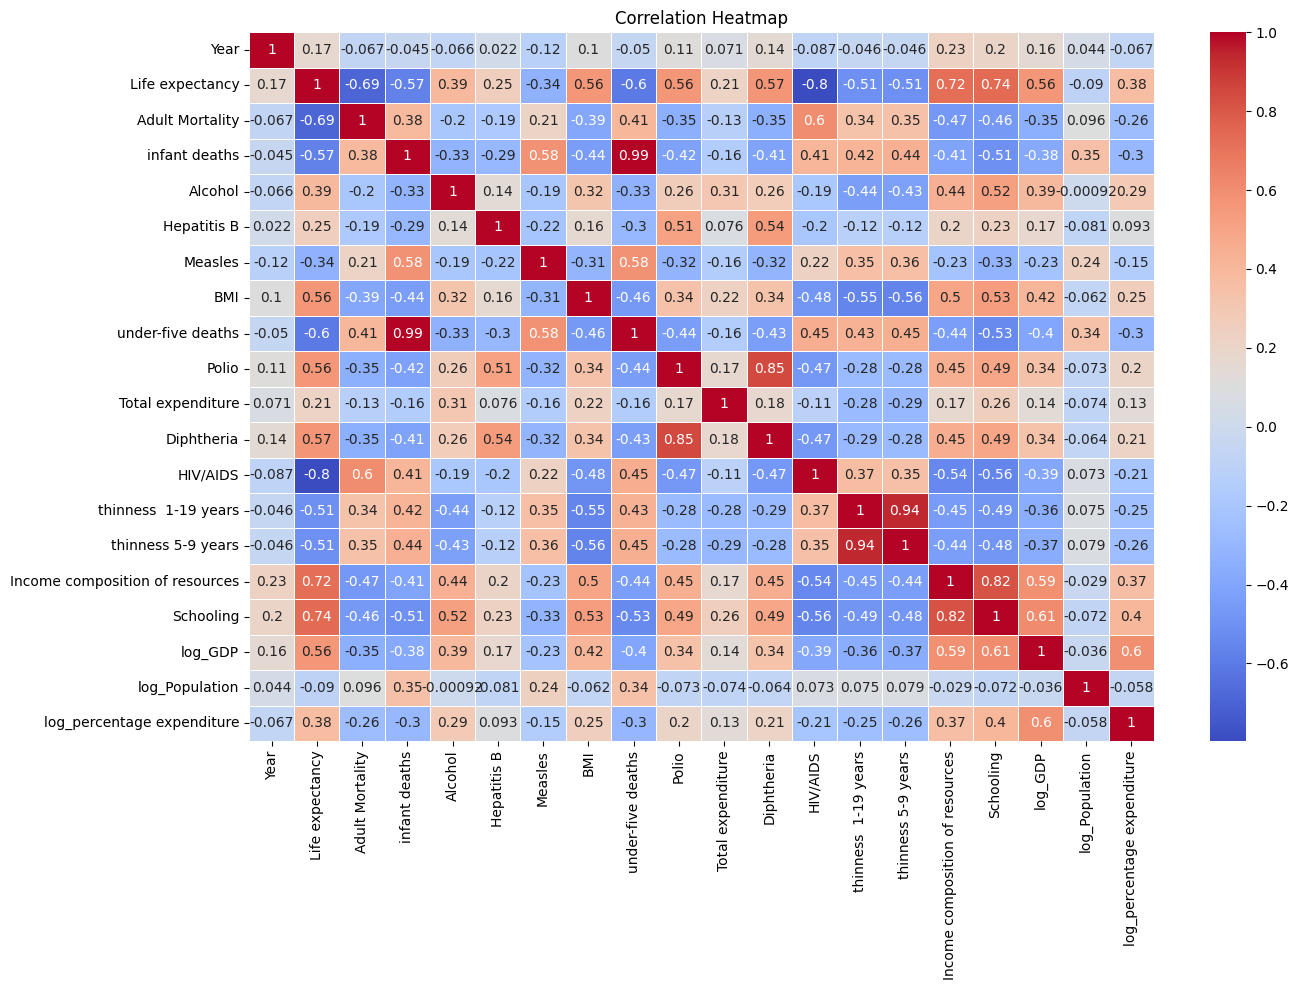

In [24]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', annot=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


**Factors Affecting Life Expectancy: A Summary with Correlation Insights**

**Factors that Boost Life Expectancy (Strong Positive Relationships):**

Education (Schooling): The correlation heatmap shows a strong positive correlation (0.74) between years of schooling and life expectancy. This indicates that more one is educated the longer one tends to lives,  and this could be attributed to better health knowledge and job opportunities.

Basic Needs (Income Composition of Resources): A high correlation (0.72) with life expectancy highlights the importance of access to basic needs like food, shelter, and health services, leading to a longer lifespan.

Wealth (log_GDP): Wealthier countries tend to have better healthcare systems, and the correlation heatmap confirms this with a positive correlation of 0.56 between log_GDP and life expectancy.

Nutrition (BMI): A healthy BMI range is associated with longer lives. The heatmap reveals a positive correlation of 0.56, suggesting better nutrition supports a longer lifespan.

Vaccinations (Diphtheria, Polio, Hepatitis B): The heatmap shows positive correlations around 0.55-0.57 for immunizations and life expectancy, indicating that vaccinated populations live longer.

**Strong Negative Relationships:**

HIV/AIDS: The correlation heatmap reveals a very strong negative correlation (-0.80) between HIV/AIDS and life expectancy, emphasizing the critical role of disease control in public health.This means that HIV/AIDS impcats negatively on life expectancy, thus reducing survival years for those infected.

Adult Deaths (Adult Mortality): A strong negative correlation (-0.69) highlights the direct impact of adult mortality rates on reducing average life expectancy.

Child Deaths (Under-Five Deaths, Infant Deaths): High child mortality rates, as shown by negative correlations of -0.60 and -0.57 respectively, significantly lower a country's average life span.

Measles: The heatmap indicates a negative correlation of -0.34, suggesting that weak vaccination coverage and poor healthcare contributes to lower life expectancy.

**Other Observations from the Heatmap:**

Alcohol: A moderate correlation (0.39) suggests higher alcohol consumption is somewhat associated with higher life expectancy. This does not mean alcohol causes people to live longer, but there could be other confounding factors e.g., wealthier countries both drink more and have better healthcare and this could be a dynamic at play.

Population Size: The heatmap shows a near-neutral correlation (-0.09) between log_Population and life expectancy, indicating that population size does not directly affect the lifespan of individuals.

**In conclusion**, the correlation heatmap provides visual confirmation of the key factors influencing life expectancy. Education, basic needs, wealth, nutrition, and vaccinations are positively correlated with longer lives, while diseases, high mortality rates, and poor healthcare are negatively correlated.

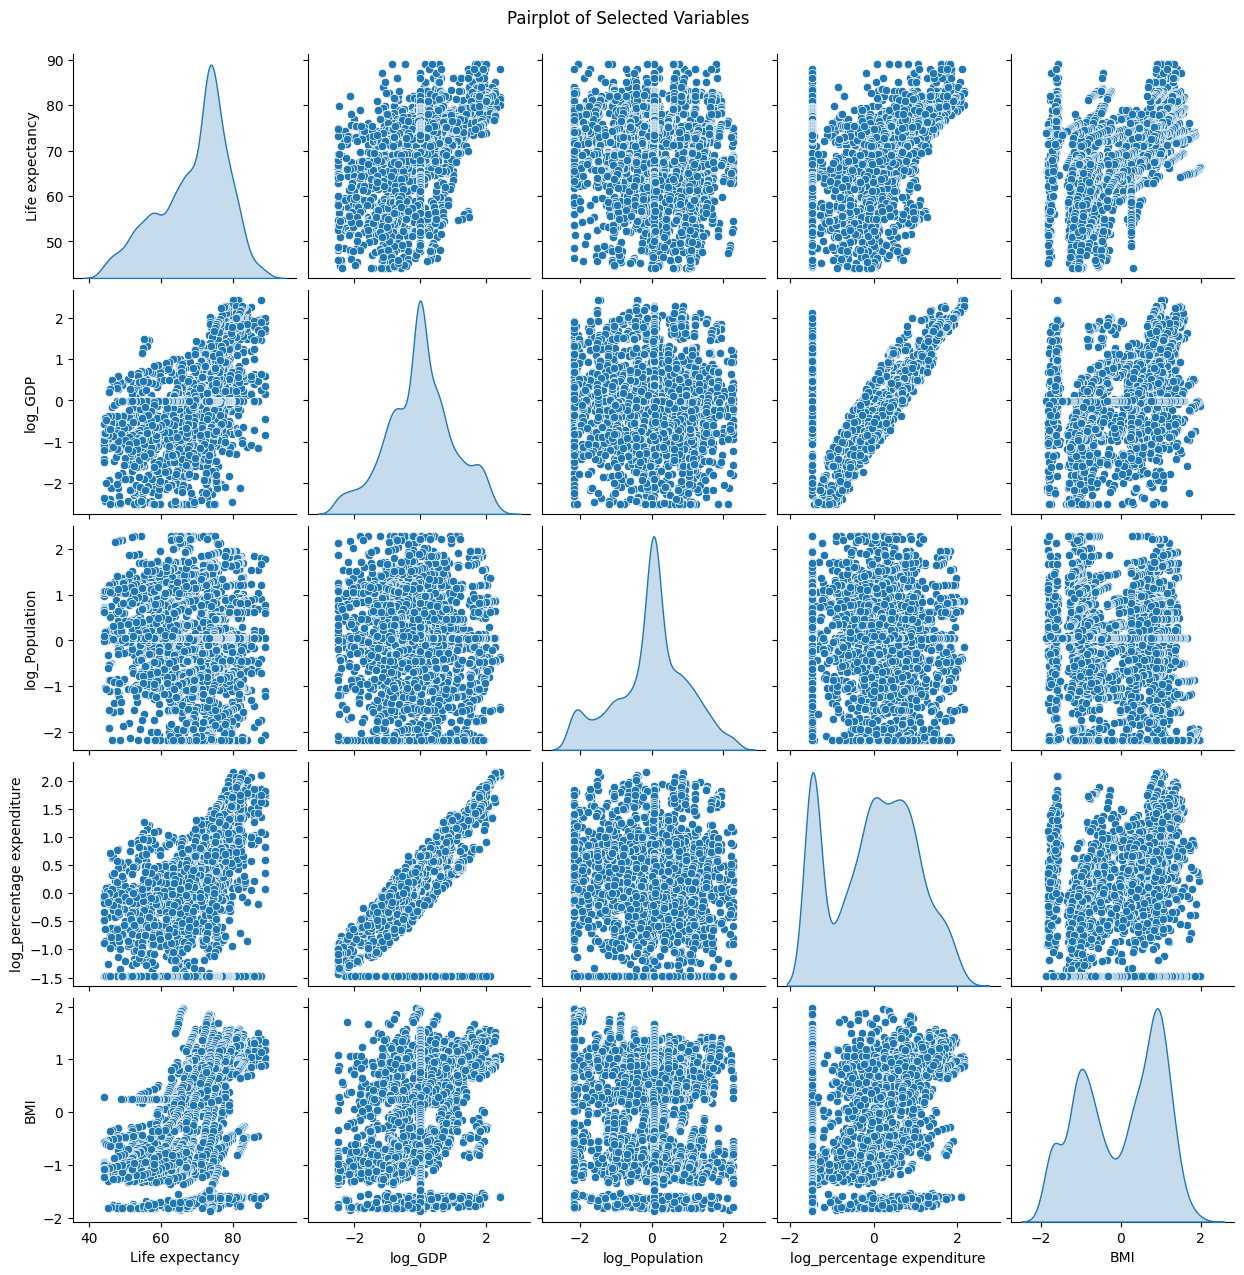

In [25]:
# Pairplot for a few selected variables
selected_features = ['Life expectancy', 'log_GDP', 'log_Population', 'log_percentage expenditure', 'BMI']
sns.pairplot(df[selected_features], diag_kind='kde')
plt.suptitle("Pairplot of Selected Variables", y=1.02)
plt.show()

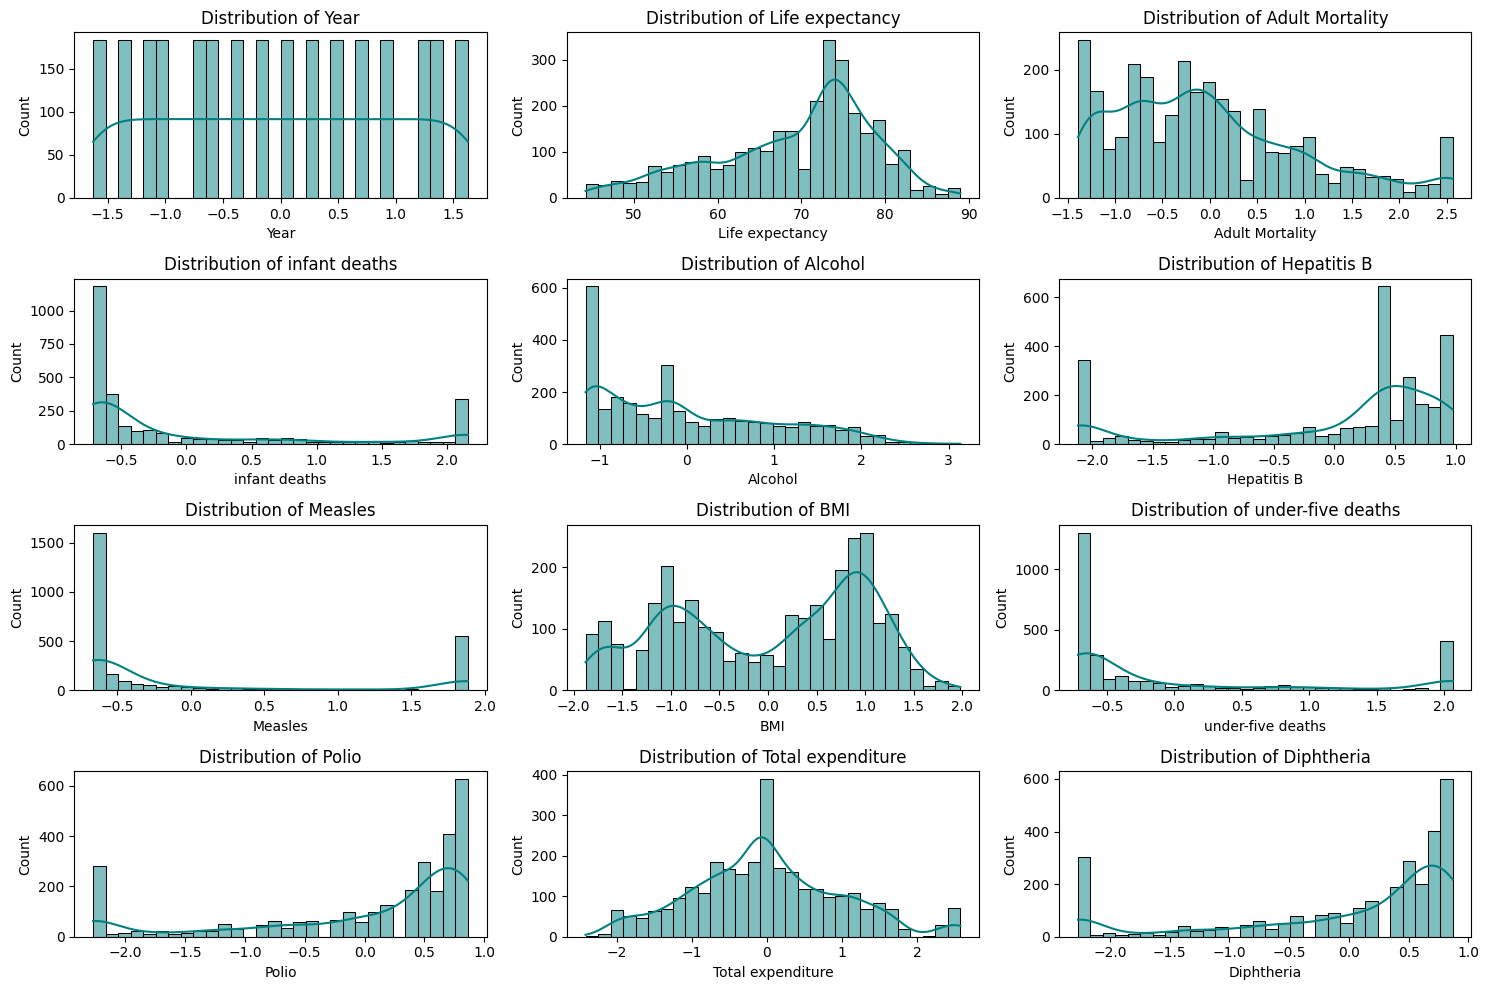

In [26]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns[:12]):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='teal')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


In [27]:
from sklearn.feature_selection import SelectKBest, f_regression

In [28]:
selected_features = [
    'HIV/AIDS',
    'Schooling',
    'Income composition of resources',
    'Adult Mortality',
    'under-five deaths',
    'Diphtheria',
    'infant deaths',
    'Polio',
    'log_GDP',
    'BMI'
]

X = df[selected_features]
y = df['Life expectancy']

In [29]:
# Select top k features based on F-statistic (for regression)
selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]
print(selected_features)

Index(['HIV/AIDS', 'Schooling', 'Income composition of resources',
       'Adult Mortality', 'under-five deaths', 'Diphtheria', 'infant deaths',
       'Polio', 'log_GDP', 'BMI'],
      dtype='object')


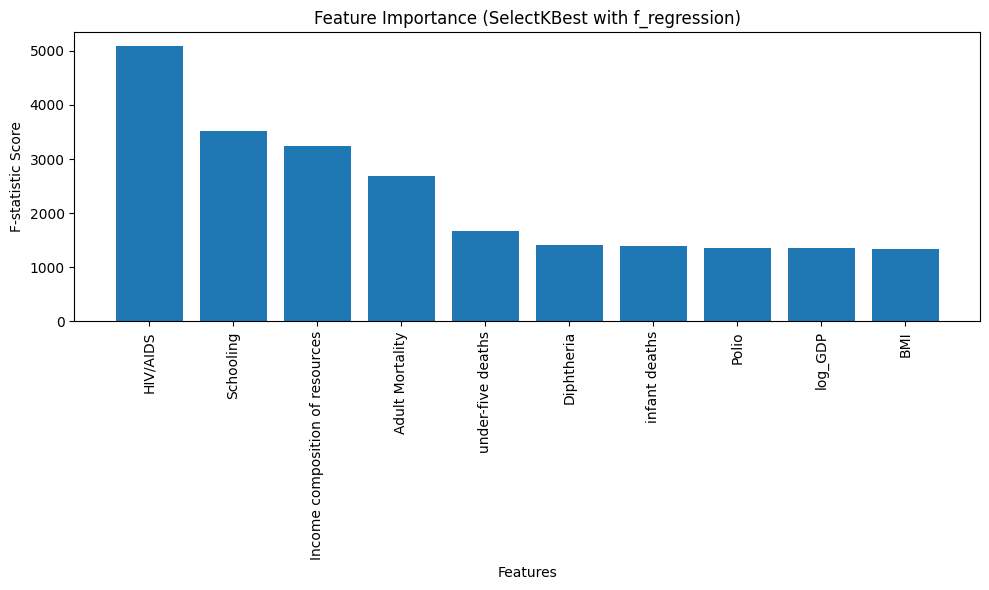

In [30]:
# Create and fit SelectKBest
selector = SelectKBest(score_func=f_regression, k=10)
selector.fit(X, y)

scores = selector.scores_
feature_names = X.columns

# Sort features by score
sorted_indices = np.argsort(scores)[::-1]
sorted_scores = scores[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature scores
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_names)), sorted_scores, align='center')
plt.xticks(range(len(sorted_feature_names)), sorted_feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("F-statistic Score")
plt.title("Feature Importance (SelectKBest with f_regression)")
plt.tight_layout()
plt.show()

#Model Building

In [31]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.tree import DecisionTreeRegressor


In [33]:

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = {
        "R2": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred)
    }
    results[name] = result



In [34]:
for name, result in results.items():
    print(f"\n{name} Results:")
    for metric, value in result.items():
        print(f"{metric}: {value:.4f}")


Linear Regression Results:
R2: 0.8444
RMSE: 3.6644
MAE: 2.8403

Random Forest Results:
R2: 0.9641
RMSE: 1.7589
MAE: 1.1308

Decision Tree Results:
R2: 0.9166
RMSE: 2.6828
MAE: 1.6592


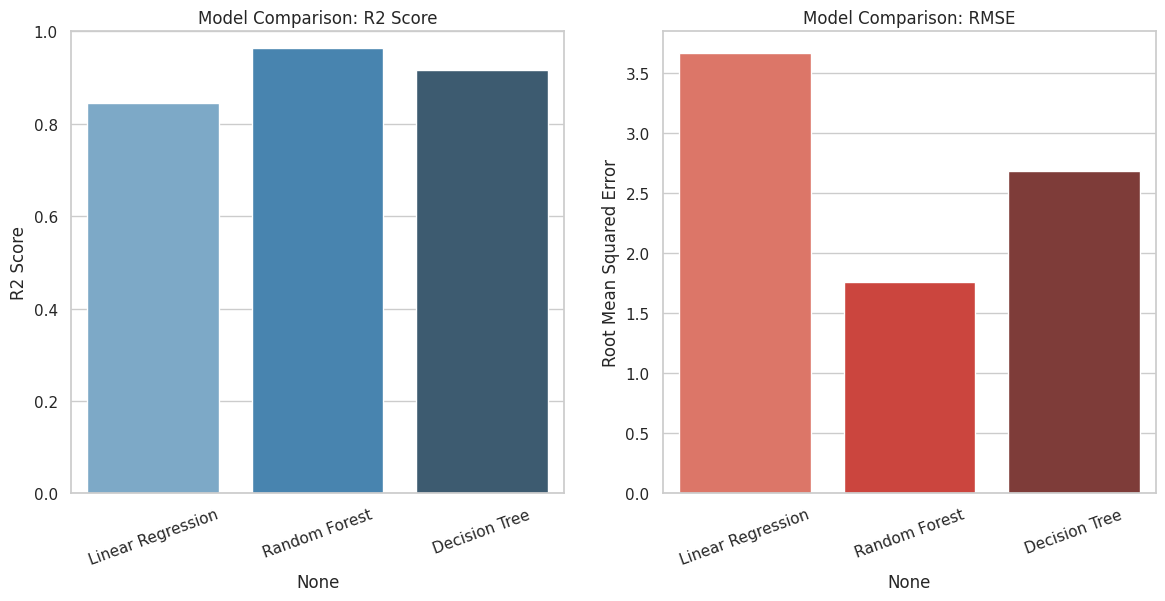

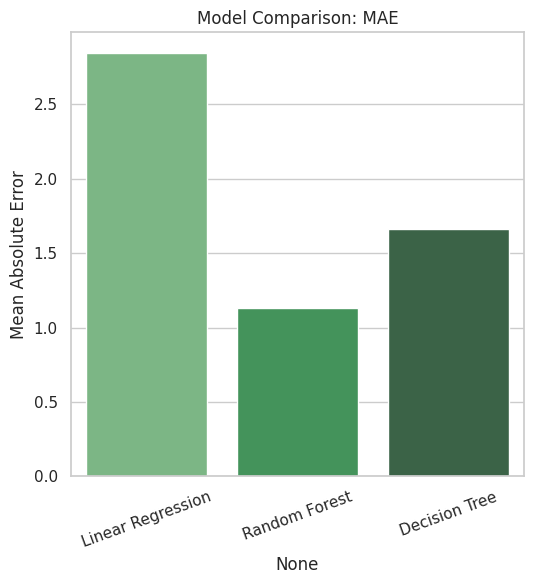

In [53]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

results_df = pd.DataFrame(results).transpose()

# Plot R2
sns.barplot(x=results_df.index, y='R2', data=results_df, ax=axes[0], hue=results_df.index, palette="Blues_d", legend=False)
axes[0].set_title('Model Comparison: R2 Score')
axes[0].set_ylabel('R2 Score')
axes[0].set_ylim(0, 1)
axes[0].tick_params(axis='x', rotation=20)

# Plot RMSE
sns.barplot(x=results_df.index, y='RMSE', data=results_df, ax=axes[1], hue=results_df.index, palette="Reds_d", legend=False)
axes[1].set_title('Model Comparison: RMSE')
axes[1].set_ylabel('Root Mean Squared Error')
axes[1].tick_params(axis='x', rotation=20)

# Plot MAE
plt.figure(figsize=(5.5, 6))
sns.barplot(x=results_df.index, y='MAE', data=results_df, hue=results_df.index, palette="Greens_d", legend=False)
plt.title('Model Comparison: MAE')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=20)

plt.tight_layout()
plt.show()

In [36]:
# Train the best model
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

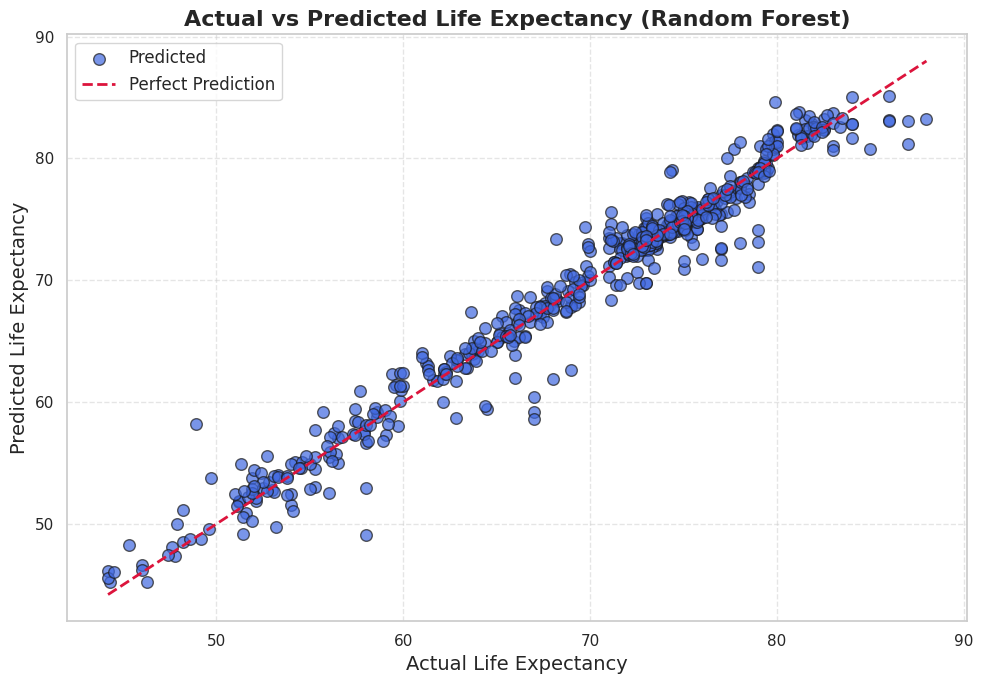

In [37]:
# Create a polished visualization
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, color='royalblue', edgecolor='k', s=70, alpha=0.7, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='crimson', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.xlabel("Actual Life Expectancy", fontsize=14)
plt.ylabel("Predicted Life Expectancy", fontsize=14)
plt.title("Actual vs Predicted Life Expectancy (Random Forest)", fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


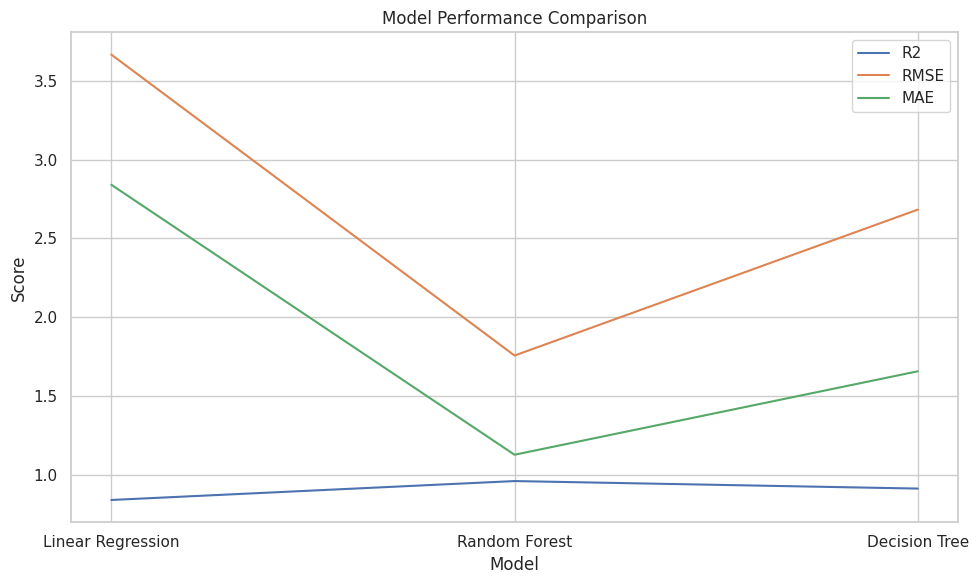

In [38]:
# Plot model performance comparison
plt.figure(figsize=(10, 6))
for metric in ['R2', 'RMSE', 'MAE']:
    plt.plot(results.keys(), [results[model].get(metric, 0) for model in results], label=metric)
plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Conclusion:**

**Model Performance Summary**

Based on the model performance comparison, the Random Forest Regressor demonstrated the best predictive capability. It achieved the highest R² score, indicating that it explains the largest proportion of variance in life expectancy, while simultaneously producing the lowest RMSE and MAE values, reflecting minimal prediction error. In contrast, the Linear Regression and Decision Tree models showed comparatively lower R² scores and higher error metrics. Therefore, Random Forest is the most suitable model for accurately predicting life expectancy in this study.